# 종합실습3 이변량분석(y-범주) : 직원 이직 분석

![](https://www.talentalign.com/wp-content/uploads/2019/09/main-qimg-2434943004743f79c0abf540cb4f6e2c-cropped.jpg)

* 직원 이직 분석
    * 회사에서 최근 1~2년 사이 이직률이 상승하였습니다.
    * 여러분은, 직원들이 이직하는데 중요한 요인이 무엇인지 데이터를 기반으로 한 분석을 의뢰 받았습니다.

# 1.환경준비

* 라이브러리 불러오기

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic      #mosaic plot!

import scipy.stats as spst

* 데이터 불러오기 : 다음의 예제 데이터를 사용합니다.

In [ ]:
# 직원 이직 데이터
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/Attrition_simple3.csv'
data = pd.read_csv(path)
data.head()

> * 변수설명
    * Attrition	:	이직여부, Yes , No (Target)
    * Age	:	나이
    * DistanceFromHome	:	집-직장 거리(마일)
    * EmployeeNumber	:	사번
    * Gender	:	성별(Male, Female)
    * JobSatisfaction	:	직무 만족도, 다음시트 참조
    * MaritalStatus	:	결혼상태(Married, Single, Divorced)
    * MonthlyIncome	:	월급(달러)
    * OverTime	:	야근여부
    * PercentSalaryHike	:	전년대비 급여인상율(%)
    * TotalWorkingYears	:	총 근무 연수



# 2.범주-->범주

In [ ]:
target = 'Attrition'

## (1) Gender --> Attrition

In [ ]:
feature = 'Gender'

* 교차표

In [ ]:
# 두 범주별 빈도수를 교차표로 만들어 봅시다.
pd.crosstab(data[target], data[feature])

Gender     Female  Male
Attrition              
0             157   248
1              66   129

In [ ]:
pd.crosstab(data[target], data[feature], normalize = 'columns')

Gender       Female      Male
Attrition                    
0          0.704036  0.657825
1          0.295964  0.342175

* 시각화

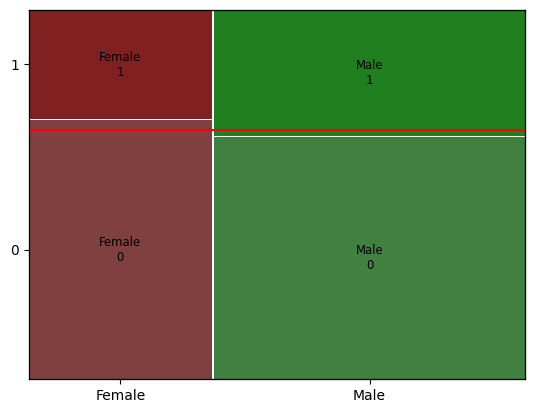

In [ ]:
mosaic(data, [ feature,target])
plt.axhline(1- data[target].mean(), color = 'r')
plt.show()

* 수치화 : 카이제곱검정

In [ ]:
# 먼저 집계
table = pd.crosstab(data[target], data[feature])
print('교차표\n', table)
print('-' * 100)

# 카이제곱검정
result = spst.chi2_contingency(table)
print('카이제곱통계량', result[0])
print('p-value', result[1])
print('자유도', result[2])
# print('기대빈도\n',result[3])

교차표
 Gender     Female  Male
Attrition              
0             157   248
1              66   129
----------------------------------------------------------------------------------------------------
카이제곱통계량 1.1614318259891623
p-value 0.28116879016055174
자유도 1


* 파악된 내용을 기술해 봅시다.

In [ ]:
# 카이제곱검정으로는 관련이 없다고 나오나, 그래프로 볼때 약간 관련이 있다고 판단됨.

## (2) JobSatisfaction --> Attrition

* 교차표

* 시각화

* 수치화 : 카이제곱검정

* 파악된 내용을 기술해 봅시다.

## (3) MaritalStatus --> Attrition

* 교차표

* 시각화

* 수치화 : 카이제곱검정

* 파악된 내용을 기술해 봅시다.

## (4) OverTime --> Attrition

* 교차표

* 시각화

* 수치화 : 카이제곱검정

* 파악된 내용을 기술해 봅시다.

# 3.숫자-->범주

## (1) Age --> Attrition

In [ ]:
feature = 'Age'

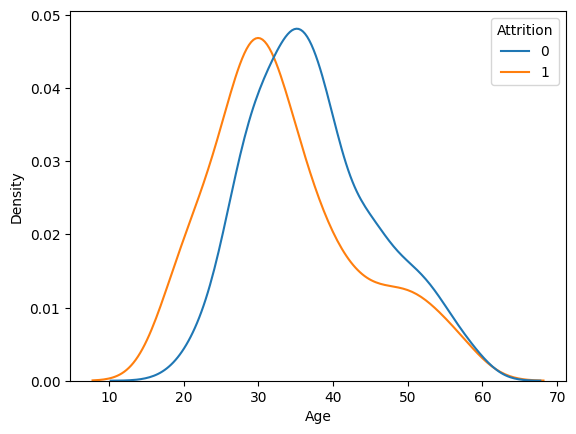

In [ ]:
sns.kdeplot(x= feature, data = data, hue = target,
            common_norm = False)
plt.show()

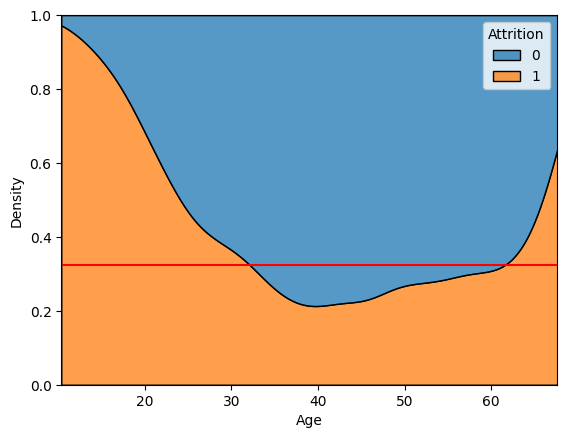

In [ ]:
sns.kdeplot(x= feature, data = data, hue = target, multiple = 'fill')
plt.axhline(data[target].mean(), color = 'r')
plt.show()

* 파악된 내용을 기술해 봅시다.

## (2) DistanceFromHome --> Attrition

* 파악된 내용을 기술해 봅시다.

## (3) MonthlyIncome --> Attrition

* 파악된 내용을 기술해 봅시다.

## (4) PercentSalaryHike --> Attrition

* 파악된 내용을 기술해 봅시다.

## (5) TotalWorkingYears --> Attrition

* 파악된 내용을 기술해 봅시다.

# 4.관계 정리하기

① 강한관계

② 중간관계

③ 관계없음(약한 관계)